# Histograms of the GS wavefunctions.

In [1]:
import numpy as np
import h5py as hdf
import matplotlib.pyplot as plt

import sys
sys.path.append('../symmetry_stuff/')
from lattice_object import LatticeObject

sys.path.append('../python_gauss_lattice/')
from gauss_lattice.aux_stuff import read_winding_sector
from gauss_lattice.aux_stuff import read_winding_sector
from gauss_lattice import HamiltonianBuilder

def get_states():
    ws224, _ = read_winding_sector([2,2,4], [0,0,0], basedir='../python_data/local_state_storage/')
    return np.sort(ws224)

# weight_data = {
#     -3.0 : np.load('counted_plaquettes_lam-3.npy'),
#     0.0 : np.load('counted_plaquettes_lam0.npy')
# }
pcount = np.load('counted_plaquettes_lam0.npy')[:,1]

datadir = '../python_data/states_histograms/'

In [2]:
with hdf.File(datadir+'results_bosons_wx_4-wy_4-wz_2_2x2x4.hdf5', 'r') as f:
    for g in f:
        print(g)

eigenstates_lam_-0.750000
eigenstates_lam_-1.500000
eigenstates_lam_-2.250000
eigenstates_lam_-3.000000
eigenstates_lam_0.000000
spectrum_lam_-0.750000
spectrum_lam_-1.500000
spectrum_lam_-2.250000
spectrum_lam_-3.000000
spectrum_lam_0.000000


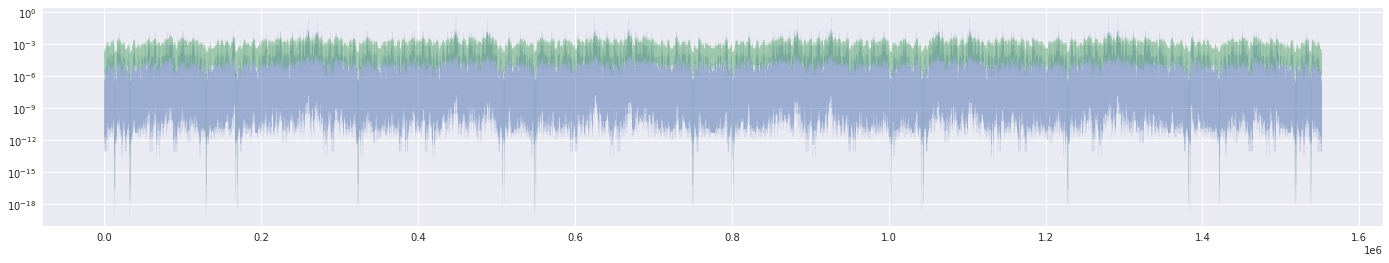

In [3]:
data = {}
with hdf.File(datadir+'results_bosons_wx_4-wy_4-wz_2_2x2x4.hdf5', 'r') as f:
    data[-3.0] = f['eigenstates_lam_-3.000000'][...,0]
    data[0.0] = f['eigenstates_lam_0.000000'][...,0]

with plt.style.context('seaborn'):
    fig, ax = plt.subplots()
    fig.set_size_inches(24, 4)
    
    ax.plot(np.abs(data[-3.0]), ls='-', lw=0.1, marker='', alpha=0.5)
    ax.plot(np.abs(data[0.0]), ls='-', lw=0.1, marker='', alpha=0.5)
    
    ax.set_yscale('log')

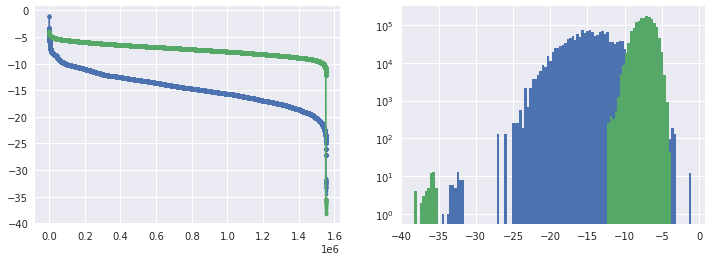

In [4]:
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(12, 4)
    
    xm3 = np.conj(data[-3.0])*data[-3.0]
    lxm3 = np.log10(xm3)
    x0 = np.conj(data[0.0])*data[0.0]
    lx0 = np.log10(x0)
                  
    ax[0].plot(np.sort(lxm3)[::-1], ls='-', marker='.')
    ax[0].plot(np.sort(lx0)[::-1], ls='-', marker='.')
    
    ax[1].hist(lxm3, bins=100)
    ax[1].hist(lx0, bins=100)
    
    ax[1].set_yscale('log')
    
#     ax[0].set_xlim(0,50)
#     ax[0].set_ylim(-4,1)

##### Check the correlation between flippable states and weight.

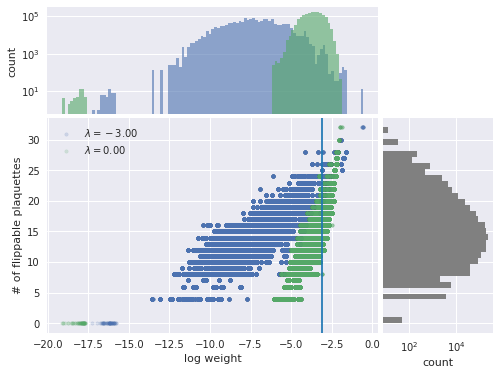

In [13]:
from matplotlib import gridspec

with plt.style.context('seaborn'):
    fig = plt.figure() 
    fig.set_size_inches(8, 6)    
    gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1], height_ratios=[1,2]) 
    ax = plt.subplot(gs[2])
    vx = plt.subplot(gs[3])
    hx = plt.subplot(gs[0])
    
    # ---
    # correlation.
    
    for l in [-3.0, 0.0]: 
        ldata = np.log10(np.abs(data[l]))
        ax.scatter(ldata, pcount, alpha=0.2, marker='.', label='$\\lambda = {:.2f}$'.format(l))
        hx.hist(ldata, bins=100, alpha=0.6)
    
    ax.set_xlabel('log weight')
    ax.set_ylabel('# of flippable plaquettes')
    ax.legend(loc='upper left')
    
    ax.axvline(np.log10(1/np.sqrt(len(ldata))))
    
    # ---
    # vertical histogram.
    vx.hist(pcount, bins=33, orientation="horizontal", color='gray')
    vx.set_yticklabels([])  
    vx.set_xlabel('count')  
    vx.set_xscale('log')
    
    # ---
    # horizontal histogram.
    hx.set_ylabel('count')
    hx.set_yscale('log')
    hx.set_xticks([])
    
    
    # ---
    fig.subplots_adjust(wspace=0.02, hspace=0.02)

### Expectation value $\langle O_{\rm f}\rangle$ 

In [165]:
abs

Norm: 1.00000, <O> = 31.310977
Norm: 1.00000, <O> = 19.069001


### Check of the small amplitude states.

In [170]:
cutoff = -15
sa_states_0 = np.argwhere(lx0<cutoff)
sa_states_m3 = np.argwhere(lxm3<cutoff)
print(f'Found {len(sa_states_0)} states.')
np.allclose(sa_states_0, sa_states_m3)

Found 48 states.


True

Supplied winding numbers [0, 0, 0] are mapped to (4, 4, 2)
Setting up lattice 270064755477776
# of flippable plaquettes: 0


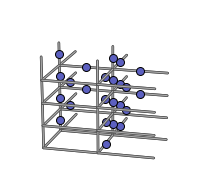

In [100]:
ws224 = get_states()
state = ws224[sa_states_0[47][0]]
latt = LatticeObject(state, L=[2,2,4])
latt.draw()

# for s in sa_states_0:
#     latt = LatticeObject(ws224[s[0]], L=[2,2,4])
#     print(latt.flippables())

### Large amplitude states.

Found 12 states.
Setting up lattice 217444056941475
# of flippable plaquettes: 32


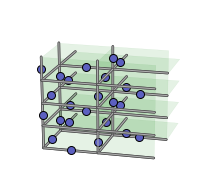

In [107]:
la_states = np.argwhere(lxm3>-1)
print(f'Found {len(la_states)} states.')

state = ws224[la_states[11][0]]
latt = LatticeObject(state, L=[2,2,4])
latt.draw()

## Comparison of all lambda values.

In [7]:
all_data = {}
with hdf.File(datadir+'results_bosons_wx_4-wy_4-wz_2_2x2x4.hdf5', 'r') as f:
    for g in f:
        l = float(g.split('_')[-1])
        if g.startswith('eigenstates'):
            all_data[l] = f[g][...,0]

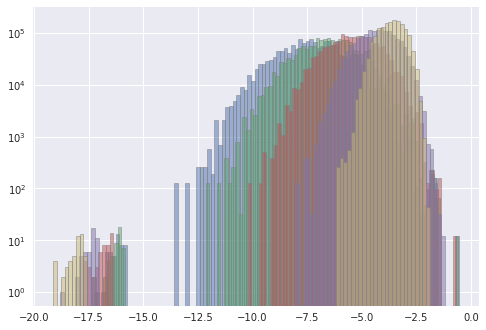

In [8]:
with plt.style.context('seaborn'):
    fig, ax = plt.subplots()
    
    for l in sorted(all_data.keys()):
        ax.hist(np.log10(np.abs(all_data[l])), bins=100, alpha=0.5, ls='-', lw=1, edgecolor='gray')
    
    ax.set_yscale('log')
    

In [1]:
lams = sorted(all_data.keys())
oflip = np.zeros(len(all_data))

for i, l in enumerate(lams):
    oflip[i] = np.dot(np.conj(all_data[l])*all_data[l], pcount) #/ (2*2*4*2)
    
    norm = np.dot(all_data[l], all_data[l])
    print('Norm: {:.5f}, <O> = {:.6f}'.format(norm, oflip[i]))
    
with plt.style.context('seaborn'):
    fig, ax = plt.subplots()
    
    ax.plot(lams, oflip, marker='o', ls='-')
    
    ax.axhline(32, ls='-', color='black', label='maximum # of flippable plaquettes')
    ax.axhline(np.mean(pcount), ls='--', color='gray', label='average of all states')
    
    
    ax.set_xlim(-3,1)
    ax.legend(loc='lower left', bbox_to_anchor=[0,.1])
    ax.set_xlabel('$\\lambda$')
    ax.set_ylabel('$\\langle O_{\\rm f} \\rangle$')

NameError: name 'all_data' is not defined